In [1]:
#this script is to plot OT dirunal cylce (time of OT maximum/minimum numer, difference between minimum and maximum)
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

latres=1
lonres=1
xdim=int(360/lonres)
ydim=int(180/latres)

nlatres=5
nlonres=5
nxdim=int(360/nlonres)
nydim=int(180/nlatres)


All_OT_num=np.zeros((xdim,ydim,12,4),'f')# 1:30,10:30,13:30,22:30
nAll_OT_num=np.zeros((nxdim,nydim,12,4),'f')


#years=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',\
#    '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
years=['2003','2004','2005','2006','2007','2008','2009',\
    '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
#years=['2002']

for year in years:
    fname='/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_'+year+'.h5'
    aquafname='/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_'+year+'.h5'
    print(fname)
    fid = h5py.File(fname,'r')
    terra_OT_num= fid['OT_num'] 
    #OTA = fid['OTA_map']
    #OTA_poly=fid['OTA_poly_map']
    fid = h5py.File(aquafname,'r')
    aqua_OT_num= fid['OT_num'] 
    All_OT_num[:,:,:,1] = All_OT_num[:,:,:,1] + terra_OT_num[:,:,:,0]
    All_OT_num[:,:,:,3] = All_OT_num[:,:,:,3] + terra_OT_num[:,:,:,1]
    All_OT_num[:,:,:,0] = All_OT_num[:,:,:,0] + aqua_OT_num[:,:,:,1]
    All_OT_num[:,:,:,2] = All_OT_num[:,:,:,2] + aqua_OT_num[:,:,:,0]
    #All_OTA = All_OTA + OTA#np.multiply(OT_num,OTA)
    #All_OTA_poly = All_OTA_poly + OTA_poly
    
#=== to average to a new grid ======
for xi in range(nxdim):
    #print(xi,xi*5,(xi+1)*5)
    for yi in range(nydim):
        lonlow=xi*nlonres
        lonup =(xi+1)*nlonres
        latlow=yi*nlatres
        latup =(yi+1)*nlatres
        #print(All_OT_num[lonlow:lonup,latlow:latup,:,:].shape)
        tpnum=np.sum(All_OT_num[lonlow:lonup,latlow:latup,:,:],axis=0)
        tpnum=np.sum(tpnum,axis=0)
        nAll_OT_num[xi,yi,:,:]= tpnum
        #tpota=np.sum(All_OTA[lonlow:lonup,latlow:latup,:,:],axis=0)
        #tpota=np.sum(tpota,axis=0)
        #nAll_OTA[xi,yi,:,:]=tpota
        
#== plot === seasonal ===
fontsz=14
Season_OT_num=np.zeros((nxdim,nydim,4,4),'i')

Season_OT_num[:,:,0,:]=nAll_OT_num[:,:,2,:]+nAll_OT_num[:,:,3,:]+nAll_OT_num[:,:,4,:] #MAM
Season_OT_num[:,:,1,:]=nAll_OT_num[:,:,5,:]+nAll_OT_num[:,:,6,:]+nAll_OT_num[:,:,7,:] #JJA
Season_OT_num[:,:,2,:]=nAll_OT_num[:,:,8,:]+nAll_OT_num[:,:,9,:]+nAll_OT_num[:,:,10,:] #SON
Season_OT_num[:,:,3,:]=nAll_OT_num[:,:,11,:]+nAll_OT_num[:,:,0,:]+nAll_OT_num[:,:,1,:] #DJF



/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2003.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2004.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2005.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2006.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2007.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2008.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2009.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2010.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2011.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2012.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2013.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2014.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2015.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_2016.h5
/data/keeling/a/yulanh/c/OT_climatology/MODIS_OT

(72, 36, 4, 4)


/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle vis

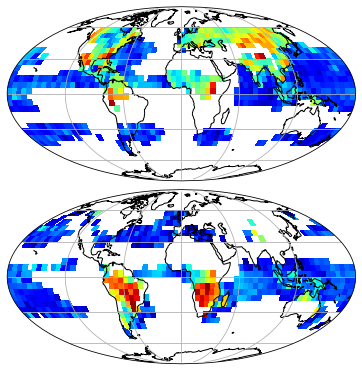

In [2]:
season_OTmax_time=np.zeros((nxdim,nydim,4),'f')
season_OTmin_time=np.zeros((nxdim,nydim,4),'f')
season_OTamplitude=np.zeros((nxdim,nydim,4),'f')

lon=np.arange(nxdim)*nlonres-180+nlonres/2.0
lat=np.arange(nydim)*nlatres-90+nlatres/2.0
nvmin=0
nvmax=3
fontsz=12
min_num_ig=30

print(Season_OT_num.shape)
for xi in range(nxdim):
    for yi in range(nydim):
        for zi in range(4):
            tp_OTnum=Season_OT_num[xi,yi,zi,:]
            if (min(tp_OTnum) >= min_num_ig):
                ind=np.where(max(tp_OTnum) == tp_OTnum)[0]
                season_OTmax_time[xi,yi,zi]=ind[0]+1
                
                ind=np.where(min(tp_OTnum) == tp_OTnum)[0]
                season_OTmin_time[xi,yi,zi]=ind[0]+1
                
                amplitude=(max(tp_OTnum)-min(tp_OTnum))/np.mean(tp_OTnum)
                season_OTamplitude[xi,yi,zi]=amplitude
               # print(xi,yi,zi,ind)
                
fig,axs =plt.subplots(2,figsize=([8,8]),subplot_kw={'projection': ccrs.Mollweide()},constrained_layout=True)
img_extent=(-180,180,-90,90)
data=season_OTamplitude[:,:,1]
data=data.T
#data=np.fliplr(data)
data[data ==0]='nan'
s0=axs[0].pcolormesh(lon,lat,data,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap=plt.get_cmap('jet'))#('Set3',4)) #('jet'))
axs[0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylabels_left = False
#cb=plt.colorbar(s0,orientation='horizontal')
data=season_OTamplitude[:,:,3]
data=data.T   
data[data ==0]='nan'

s0=axs[1].pcolormesh(lon,lat,data,transform=ccrs.PlateCarree(),vmin=nvmin,vmax=nvmax,cmap=plt.get_cmap('jet'))#('Set3',4))#('jet'))
axs[1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylabels_left = False

fig.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.05)


#cb=plt.colorbar(s0,ax=axs[1],orientation='horizontal',shrink=0.45,pad=0.15)
#cb.ax.tick_params(labelsize=fontsz)
#cb.set_label(label='Time (hour)',size=fontsz)
#cb.set_ticks([1,2,3,4])
#cb.ax.set_yticklabels(['01:30','10:30','13:30','22:30'])

In [37]:
print(np.min(season_OTamplitude))

0.0
